In [961]:
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

from collections import Counter
import datetime as dt

Adli Aulia Fattah H

Data B

In [962]:
#Clear style matplotlib
plt.rcdefaults() 

In [963]:
data = pd.read_csv("D:/Code/Mentorship AI/Intermediate Python/hotel_bookings.csv")
data

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,7/3/2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,9/6/2017
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,9/7/2017
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,9/7/2017
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,9/7/2017


In [964]:
data.shape

(119390, 32)

In [965]:
#cek tipe data
data.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [966]:
#Berapa banyak data yang kosong
data.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [967]:
#drop column company
data.drop('company', inplace=True, axis=1)
data

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,3,No Deposit,NaN,0,Transient,0.00,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,4,No Deposit,NaN,0,Transient,0.00,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,No Deposit,NaN,0,Transient,75.00,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,No Deposit,304.0,0,Transient,75.00,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,No Deposit,240.0,0,Transient,98.00,0,1,Check-Out,7/3/2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,0,No Deposit,394.0,0,Transient,96.14,0,0,Check-Out,9/6/2017
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,0,No Deposit,9.0,0,Transient,225.43,0,2,Check-Out,9/7/2017
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,0,No Deposit,9.0,0,Transient,157.71,0,4,Check-Out,9/7/2017
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,0,No Deposit,89.0,0,Transient,104.40,0,0,Check-Out,9/7/2017


In [968]:
data['country'].mode()[0]

'PRT'

In [969]:
data['agent'] = data['agent'].fillna(data['agent'].mean())
data['country'] = data['country'].fillna(data['country'].mode()[0])
data['children'] = data['children'].fillna(data['children'].mode()[0])
data

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,3,No Deposit,86.693382,0,Transient,0.00,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,4,No Deposit,86.693382,0,Transient,0.00,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,No Deposit,86.693382,0,Transient,75.00,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,No Deposit,304.000000,0,Transient,75.00,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,No Deposit,240.000000,0,Transient,98.00,0,1,Check-Out,7/3/2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,0,No Deposit,394.000000,0,Transient,96.14,0,0,Check-Out,9/6/2017
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,0,No Deposit,9.000000,0,Transient,225.43,0,2,Check-Out,9/7/2017
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,0,No Deposit,9.000000,0,Transient,157.71,0,4,Check-Out,9/7/2017
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,0,No Deposit,89.000000,0,Transient,104.40,0,0,Check-Out,9/7/2017


In [970]:
data.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces 

In [971]:
data.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103886,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398555,0.097436,0.175767,0.844336,1.497437,0.652306,102.915247,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,28.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,152.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,391.000000,5400.000000,8.000000,5.000000


In [972]:
data[['lead_time', 'adults', 'children', 'babies', 'adr']].mean()

lead_time    104.011416
adults         1.856403
children       0.103886
babies         0.007949
adr          101.831122
dtype: float64

In [973]:
data[['lead_time', 'adults', 'children', 'babies', 'adr']].median()

lead_time    69.000
adults        2.000
children      0.000
babies        0.000
adr          94.575
dtype: float64

In [974]:
data[['lead_time', 'adults', 'children', 'babies', 'adr']].std()

lead_time    106.863097
adults         0.579261
children       0.398555
babies         0.097436
adr           50.535790
dtype: float64

In [975]:
data[['lead_time', 'adults', 'children', 'babies', 'adr']].max()

lead_time     737.0
adults         55.0
children       10.0
babies         10.0
adr          5400.0
dtype: float64

In [976]:
data[['lead_time', 'adults', 'children', 'babies', 'adr']].min()

lead_time    0.00
adults       0.00
children     0.00
babies       0.00
adr         -6.38
dtype: float64

In [977]:
#cleaning data kosong yang tersisa
data = data.dropna(axis = 0, how ='any') 
data

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,3,No Deposit,86.693382,0,Transient,0.00,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,4,No Deposit,86.693382,0,Transient,0.00,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,No Deposit,86.693382,0,Transient,75.00,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,No Deposit,304.000000,0,Transient,75.00,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,No Deposit,240.000000,0,Transient,98.00,0,1,Check-Out,7/3/2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,0,No Deposit,394.000000,0,Transient,96.14,0,0,Check-Out,9/6/2017
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,0,No Deposit,9.000000,0,Transient,225.43,0,2,Check-Out,9/7/2017
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,0,No Deposit,9.000000,0,Transient,157.71,0,4,Check-Out,9/7/2017
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,0,No Deposit,89.000000,0,Transient,104.40,0,0,Check-Out,9/7/2017


In [978]:
#cek apakah data ada yang masih kosong
data.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces 

In [979]:
data.shape

(119390, 31)

In [980]:
#Make category based on the lead time: Short, Medium, Long
#Exercise 
conditions = [
    (data['lead_time'] < 69),
    (data['lead_time'] >= 69) & (data['lead_time'] <= 160),
    (data['lead_time'] > 160)
    ]

# create a list of the values we want to assign for each condition
values = ['Short Time', 'Medium Time', 'Long Time']

# create a new column and use np.select to assign values to it using our lists as arguments
data['lead_time_cat'] = np.select(conditions, values)

# display updated DataFrame
data

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,lead_time_cat
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,86.693382,0,Transient,0.00,0,0,Check-Out,7/1/2015,Long Time
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,86.693382,0,Transient,0.00,0,0,Check-Out,7/1/2015,Long Time
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,86.693382,0,Transient,75.00,0,0,Check-Out,7/2/2015,Short Time
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.000000,0,Transient,75.00,0,0,Check-Out,7/2/2015,Short Time
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.000000,0,Transient,98.00,0,1,Check-Out,7/3/2015,Short Time
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.000000,0,Transient,96.14,0,0,Check-Out,9/6/2017,Short Time
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.000000,0,Transient,225.43,0,2,Check-Out,9/7/2017,Medium Time
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.000000,0,Transient,157.71,0,4,Check-Out,9/7/2017,Short Time
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.000000,0,Transient,104.40,0,0,Check-Out,9/7/2017,Medium Time


In [981]:
#Mengubah ke format datetime dari object
data['reservation_status_date']=pd.to_datetime(data['reservation_status_date'], format='%m/%d/%Y', errors = 'coerce')
data

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,lead_time_cat
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,86.693382,0,Transient,0.00,0,0,Check-Out,2015-07-01,Long Time
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,86.693382,0,Transient,0.00,0,0,Check-Out,2015-07-01,Long Time
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,86.693382,0,Transient,75.00,0,0,Check-Out,2015-07-02,Short Time
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.000000,0,Transient,75.00,0,0,Check-Out,2015-07-02,Short Time
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.000000,0,Transient,98.00,0,1,Check-Out,2015-07-03,Short Time
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.000000,0,Transient,96.14,0,0,Check-Out,2017-09-06,Short Time
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.000000,0,Transient,225.43,0,2,Check-Out,2017-09-07,Medium Time
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.000000,0,Transient,157.71,0,4,Check-Out,2017-09-07,Short Time
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.000000,0,Transient,104.40,0,0,Check-Out,2017-09-07,Medium Time


Memfilter datetime dari reservation_status_date >= 2017

In [982]:
# Memfilter datetime dari reservation_status_date >= 2017
filter_reservation = data[data['reservation_status_date'].dt.year >= 2017]
filter_reservation

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,lead_time_cat
9788,Resort Hotel,1,89,2017,January,1,2,1,3,2,...,No Deposit,240.000000,0,Transient,46.80,0,1,No-Show,2017-01-02,Medium Time
9805,Resort Hotel,1,6,2017,January,1,4,0,1,1,...,No Deposit,86.693382,0,Transient,39.00,0,0,Canceled,2017-01-03,Short Time
9809,Resort Hotel,1,112,2017,January,1,4,2,4,2,...,No Deposit,240.000000,0,Transient,52.00,0,2,No-Show,2017-01-04,Medium Time
9813,Resort Hotel,1,4,2017,January,1,5,0,3,2,...,No Deposit,240.000000,0,Transient,48.00,0,0,Canceled,2017-01-01,Short Time
9818,Resort Hotel,1,2,2017,January,1,6,2,3,1,...,No Deposit,240.000000,0,Transient,43.00,0,1,No-Show,2017-01-06,Short Time
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.000000,0,Transient,96.14,0,0,Check-Out,2017-09-06,Short Time
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.000000,0,Transient,225.43,0,2,Check-Out,2017-09-07,Medium Time
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.000000,0,Transient,157.71,0,4,Check-Out,2017-09-07,Short Time
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.000000,0,Transient,104.40,0,0,Check-Out,2017-09-07,Medium Time


In [983]:
filter_reservation['reservation_status_date'].describe(include='all')

count                   36483
unique                    255
top       2017-01-24 00:00:00
freq                      343
first     2017-01-01 00:00:00
last      2017-09-14 00:00:00
Name: reservation_status_date, dtype: object

In [984]:
filter_reservation['reservation_status_date'].mode()[0]

Timestamp('2017-01-24 00:00:00')

In [985]:
count_month=dict(filter_reservation['reservation_status_date'].groupby(filter_reservation.reservation_status_date.dt.month).agg('count'))
print(count_month)

{1: 5251, 2: 4858, 3: 4826, 4: 4634, 5: 5006, 6: 4060, 7: 4038, 8: 3417, 9: 393}


In [986]:
#
month=[]
amount_month=[]

for item in count_month:
    month.append(item)
    amount_month.append(count_month[item])
print(month)
print(amount_month)

[1, 2, 3, 4, 5, 6, 7, 8, 9]
[5251, 4858, 4826, 4634, 5006, 4060, 4038, 3417, 393]


In [987]:
x_label = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep']
print(x_label)

['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep']


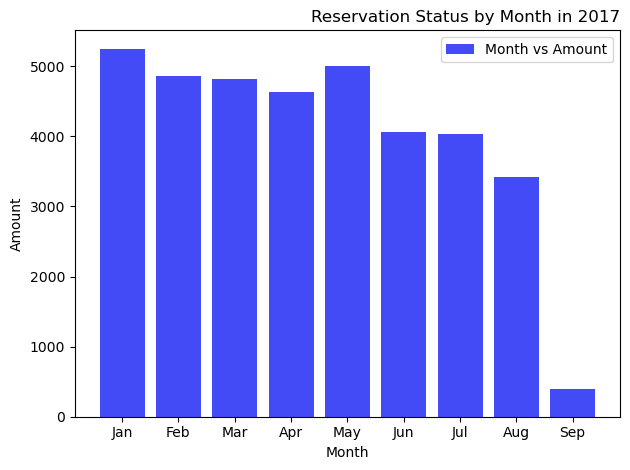

In [988]:
plt.bar(x_label, amount_month, label = "Month vs Amount", color = '#424bf5')


plt.title("Reservation Status by Month in 2017", loc= "right")
plt.xlabel("Month")
plt.ylabel("Amount")
plt.legend(loc = "upper right")
plt.xticks(ticks = x_label, labels = x_label)

plt.tight_layout()

plt.savefig("Reservation status by month in 2017_bar chart.png")
plt.show()

Visualize the arrival_date_month to see in what month the most visitors come

In [989]:
#Visualize the arrival_date_month to see in what month the most visitors come
arrival_date_month= data['arrival_date_month']

arrival_date_month_counter=Counter()
for response in arrival_date_month:
    arrival_date_month_counter.update(response.split("\n"))
month=arrival_date_month_counter.most_common()   
print(month)

[('August', 13877), ('July', 12661), ('May', 11791), ('October', 11160), ('April', 11089), ('June', 10939), ('September', 10508), ('March', 9794), ('February', 8068), ('November', 6794), ('December', 6780), ('January', 5929)]


In [990]:
Newlist=[]
Value=[]
for i in month:
    if i[0] == 'January': 
        Newlist.append(i[0])
        Value.append(i[1])
for i in month:
    if i[0] == 'February': 
        Newlist.append(i[0])
        Value.append(i[1])
for i in month:
    if i[0] == 'March': 
        Newlist.append(i[0])
        Value.append(i[1])
for i in month:
    if i[0] == 'April': 
        Newlist.append(i[0])
        Value.append(i[1])
for i in month:
    if i[0] == 'May': 
        Newlist.append(i[0])
        Value.append(i[1])
for i in month:
    if i[0] == 'June': 
        Newlist.append(i[0])
        Value.append(i[1])
for i in month:
    if i[0] == 'July': 
        Newlist.append(i[0])
        Value.append(i[1])
for i in month:
    if i[0] == 'August': 
        Newlist.append(i[0])
        Value.append(i[1])
for i in month:
    if i[0] == 'September': 
        Newlist.append(i[0])
        Value.append(i[1])
for i in month:
    if i[0] == 'October': 
        Newlist.append(i[0])
        Value.append(i[1])
for i in month:
    if i[0] == 'November': 
        Newlist.append(i[0])
        Value.append(i[1])
for i in month:
    if i[0] == 'December': 
        Newlist.append(i[0])
        Value.append(i[1])
print(Newlist)
print(Value)

['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
[5929, 8068, 9794, 11089, 11791, 10939, 12661, 13877, 10508, 11160, 6794, 6780]


In [991]:
x_label = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
print(x_label)

['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']


In [992]:
import statistics

In [993]:
mode_month=statistics.mode(month)
mode_month=mode_month[1]
print(mode_month)

13877


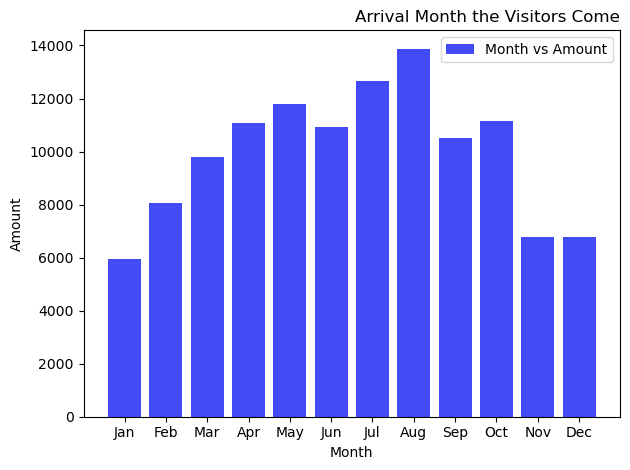

In [994]:
plt.bar(x_label, Value, label = "Month vs Amount", color = '#424bf5')

plt.title("Arrival Month the Visitors Come", loc= "right")
plt.xlabel("Month")
plt.ylabel("Amount")
plt.legend(loc = "upper right")
plt.xticks(ticks = x_label, labels = x_label)

plt.tight_layout()

plt.savefig("Arrival Month the Visitors Come.png")
plt.show()

# Ekstrak Data

In [995]:
lead_time_cat= data['lead_time_cat']

lead_time_cat_counter=Counter()
for response in lead_time_cat:
    lead_time_cat_counter.update(response.split("\n"))
    
print(lead_time_cat_counter.most_common())

[('Short Time', 59341), ('Medium Time', 30227), ('Long Time', 29822)]


In [996]:
data1 = lead_time_cat_counter.most_common()

leadtime=[]
quantity=[]

for item in data1:
    leadtime.append(item[0])
    quantity.append(item[1])
print(leadtime)
print(quantity)

['Short Time', 'Medium Time', 'Long Time']
[59341, 30227, 29822]


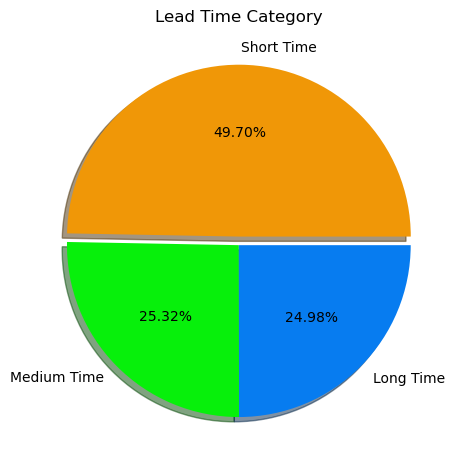

In [997]:
colors = ['#f09707', '#07f00b', '#077cf0']
explode = [0.05, 0.0, 0.0]

plt.pie(quantity, explode=explode, labels=leadtime, colors=colors, autopct= "%1.2f%%", shadow = True)

plt.title("Lead Time Category")

plt.tight_layout()

plt.savefig("lead_time_cat_pie chart.png")
plt.show()

In [998]:
hotel_booking = data["hotel"]
hotel_booking

0         Resort Hotel
1         Resort Hotel
2         Resort Hotel
3         Resort Hotel
4         Resort Hotel
              ...     
119385      City Hotel
119386      City Hotel
119387      City Hotel
119388      City Hotel
119389      City Hotel
Name: hotel, Length: 119390, dtype: object

In [999]:
booking_counter=Counter()
for response in hotel_booking:
    booking_counter.update(response.split("\n"))
    
print(type(booking_counter.most_common()))

<class 'list'>


In [1000]:
data2 = booking_counter.most_common()

hotels=[]
popularity=[]

for item in data2:
    hotels.append(item[0])
    popularity.append(item[1])
print(hotels)
print(popularity)

['City Hotel', 'Resort Hotel']
[79330, 40060]


In [1001]:
colors = ['#3449eb', '#34eb86']
explode= [0.0, 0.1]

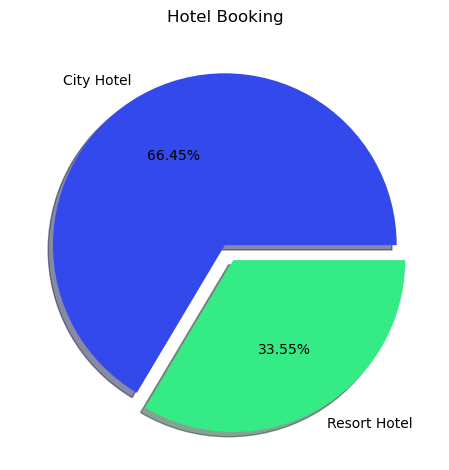

In [1002]:
plt.pie(popularity, explode=explode, labels=hotels, colors=colors, autopct= "%1.2f%%", shadow = True)

plt.title("Hotel Booking")

plt.tight_layout()

plt.savefig("Hotel Booking_pie chart.png")
plt.show()

Count reservation by year

In [1003]:
count_year=dict(data['reservation_status_date'].groupby(data.reservation_status_date.dt.year).agg('count'))
print(count_year)

{2014: 181, 2015: 24929, 2016: 57797, 2017: 36483}


In [1004]:
#
year=[]
amount=[]

for item in count_year:
    year.append(item)
    amount.append(count_year[item])
print(year)
print(amount)

[2014, 2015, 2016, 2017]
[181, 24929, 57797, 36483]


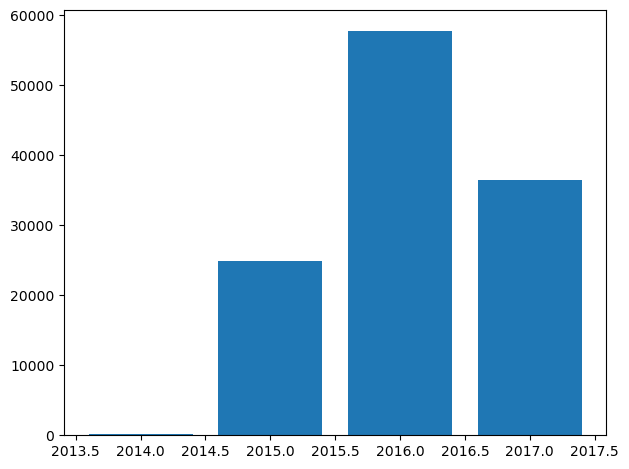

In [1005]:
#plot to bar chart
plt.bar(year, amount)
plt.tight_layout()
plt.show()

In [1006]:
x_index = np.arange(len(year))
print(x_index)

[0 1 2 3]


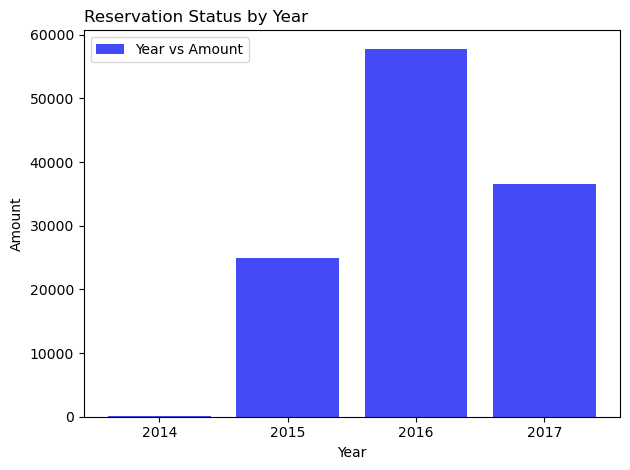

In [1007]:
plt.bar(x_index, amount, label = "Year vs Amount", color = '#424bf5')


plt.title("Reservation Status by Year", loc= "left")
plt.xlabel("Year")
plt.ylabel("Amount")
plt.legend(loc = "upper left")
plt.xticks(ticks = x_index, labels = year)

plt.tight_layout()

plt.savefig("Reservation status by year_bar chart.png")
plt.show()